In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import contextily as ctx
import os
import re
from matplotlib.colors import ListedColormap, rgb2hex, LinearSegmentedColormap
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
data_dir = "../../Data"

In [33]:
full_data = gpd.read_file(os.path.join(data_dir, "flood_ipc_seasonal_adm2_timeseries_precip.gpkg"))

In [4]:
full_data.loc[full_data['FIDcalc'] == full_data['FIDcalc'].unique()[0]][['datetime_start', 'datetime_end']]

datetime_start         datetime_end
0   2009-07-02T00:00:00  2009-10-01T00:00:00
1   2009-10-02T00:00:00  2010-01-01T00:00:00
2   2010-01-02T00:00:00  2010-04-01T00:00:00
3   2010-04-02T00:00:00  2010-07-01T00:00:00
4   2010-07-02T00:00:00  2010-10-01T00:00:00
5   2010-10-02T00:00:00  2011-01-01T00:00:00
6   2011-01-02T00:00:00  2011-04-01T00:00:00
7   2011-04-02T00:00:00  2011-07-01T00:00:00
8   2011-07-02T00:00:00  2011-10-01T00:00:00
9   2011-10-02T00:00:00  2012-01-01T00:00:00
10  2012-01-02T00:00:00  2012-04-01T00:00:00
11  2012-04-02T00:00:00  2012-07-01T00:00:00
12  2012-07-02T00:00:00  2012-10-01T00:00:00
13  2012-10-02T00:00:00  2013-01-01T00:00:00
14  2013-01-02T00:00:00  2013-04-01T00:00:00
15  2013-04-02T00:00:00  2013-07-01T00:00:00
16  2013-07-02T00:00:00  2013-10-01T00:00:00
17  2013-10-02T00:00:00  2014-01-01T00:00:00
18  2014-01-02T00:00:00  2014-04-01T00:00:00
19  2014-04-02T00:00:00  2014-07-01T00:00:00
20  2014-07-02T00:00:00  2014-10-01T00:00:00
21  2014-10-02T00:00:00  2015-01-01T00:00:00
22  2015-01-02T00:00:00  2015-04-01T00:00:00
23  2015-04-02T00:00:00  2015-07-01T00:00:00
24  2015-07-02T00:00:00  2015-10-01T00:00:00
25  2015-10-02T00:00:00  2016-02-01T00:00:00
26  2016-02-02T00:00:00  2016-06-01T00:00:00
27  2016-06-02T00:00:00  2016-10-01T00:00:00
28  2016-10-02T00:00:00  2017-02-01T00:00:00
29  2017-02-02T00:00:00  2017-06-01T00:00:00
30  2017-06-02T00:00:00  2017-10-01T00:00:00
31  2017-10-02T00:00:00  2018-02-01T00:00:00
32  2018-02-02T00:00:00  2018-06-01T00:00:00
33  2018-06-02T00:00:00  2018-10-01T00:00:00
34  2018-10-02T00:00:00  2018-12-01T00:00:00
35  2018-12-02T00:00:00  2019-02-01T00:00:00
36  2019-02-02T00:00:00  2019-06-01T00:00:00
37  2019-06-02T00:00:00  2019-10-01T00:00:00
38  2019-10-02T00:00:00  2020-02-01T00:00:00

In [5]:
full_data.describe().T

count           mean           std  \
level_0                           256972.0  131779.487181  76083.662543   
index                             256972.0    6624.614740   3278.062514   
EFF_YEAR                          256972.0    2011.040071      6.101079   
FIDcalc                           256972.0    6625.614740   3278.062514   
Year                              256972.0    2014.282031      3.037803   
Month                             256972.0       5.846158      3.475471   
no_flood_events                   256972.0       0.071167      0.281939   
no_dam_breaks                     256972.0       0.000195      0.013948   
total_flood_dur_days              256972.0       1.490100      7.162494   
flood_1_7_days                    256972.0       0.018360      0.135347   
flood_8_14_days                   256972.0       0.012472      0.112789   
flood_15_21_days                  256972.0       0.009452      0.098911   
flood_22_28_days                  256972.0       0.012468      0.114485   
flood_29_plus_days                256972.0       0.018414      0.135454   
total_flood_area_km2              256972.0      85.442078   1132.235232   
total_flood_area_std              256972.0       0.053447      0.218660   
total_displaced_dfo               256972.0    3935.539674  28374.636376   
mean_ipc                          256120.0       1.413867      0.629940   
var_ipc                           243422.0       0.067491      0.163409   
mean_ipc_diff                     249532.0      -0.008310      0.401374   
mean_ipc_deseasoned               229768.0      -0.014455      0.514639   
mean_ipc_deseasoned_diff          223179.0       0.012175      0.527187   
var_ipc_diff                      229323.0       0.000774      0.148206   
var_ipc_deseasoned                212142.0       0.003793      0.172517   
var_ipc_deseasoned_diff           193848.0       0.000488      0.198623   
no_floods_diff                    250383.0       0.002384      0.361031   
no_floods_deseasoned              230616.0       0.001669      0.337897   
no_floods_deseasoned_diff         224027.0       0.011414      0.438325   
total_flood_area_diff             250383.0      -0.000024      0.287350   
total_flood_area_deseasoned       230616.0      -0.000054      0.262199   
total_flood_area_deseasoned_diff  224027.0       0.008196      0.347695   
total_flood_dur_diff              250383.0       0.032973      8.888845   
total_flood_dur_deseasoned        230616.0      -0.044364      9.017247   
total_flood_dur_deseasoned_ret    224027.0       0.223357     11.333593   
mean_total_precip_mm              256972.0     267.639560    278.278061   
mean_total_precip_mm_diff         250383.0      -1.424905    352.785119   

                                           min           25%            50%  \
level_0                           0.000000e+00  65889.750000  131779.500000   
index                             8.730000e+02   4220.000000    6368.000000   
EFF_YEAR                          1.990000e+03   2012.000000    2013.000000   
FIDcalc                           8.740000e+02   4221.000000    6369.000000   
Year                              2.009000e+03   2012.000000    2014.000000   
Month                             1.000000e+00      2.000000       6.000000   
no_flood_events                   0.000000e+00      0.000000       0.000000   
no_dam_breaks                     0.000000e+00      0.000000       0.000000   
total_flood_dur_days              0.000000e+00      0.000000       0.000000   
flood_1_7_days                    0.000000e+00      0.000000       0.000000   
flood_8_14_days                   0.000000e+00      0.000000       0.000000   
flood_15_21_days                  0.000000e+00      0.000000       0.000000   
flood_22_28_days                  0.000000e+00      0.000000       0.000000   
flood_29_plus_days                0.000000e+00      0.000000       0.000000   
total_flood_area_km2              0.000000e+00      0.000000       0.000000 

In [6]:
plt.style.use('seaborn-whitegrid')
sns.set(font_scale = 0.8)
sns.set_palette(sns.color_palette(['#9E425C']))

In [7]:
full_data = full_data.rename(columns = {'no_floods_diff': 'Flood occurrences',
                                       'total_flood_area_diff': 'Flood area (prop. panel area)',
                                       'total_flood_dur_diff': 'Cumulative flood durations (days)',
                                       'mean_total_precip_mm_diff': 'Mean total seasonal precipitation (mm)'})

In [8]:
cols = ['Flood occurrences', 'Flood area (prop. panel area)', 
        'Cumulative flood durations (days)', 'Mean total seasonal precipitation (mm)']

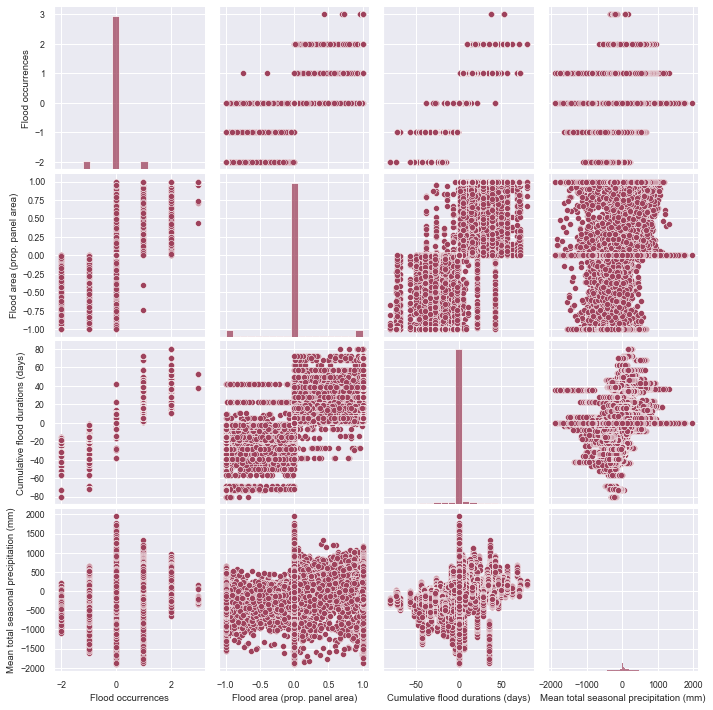

In [9]:
sns.pairplot(full_data, vars = ['Flood occurrences', 'Flood area (prop. panel area)', 
                                'Cumulative flood durations (days)', 'Mean total seasonal precipitation (mm)'])


plt.show()

In [10]:
def conjunction(*conditions):
    return reduce(np.logical_and, conditions)

In [11]:
cols = ['Flood occurrences', 'Flood area (prop. panel area)', 
        'Cumulative flood durations (days)', 'Mean total seasonal precipitation (mm)']

conditions = [full_data[v] != 0 for v in cols]

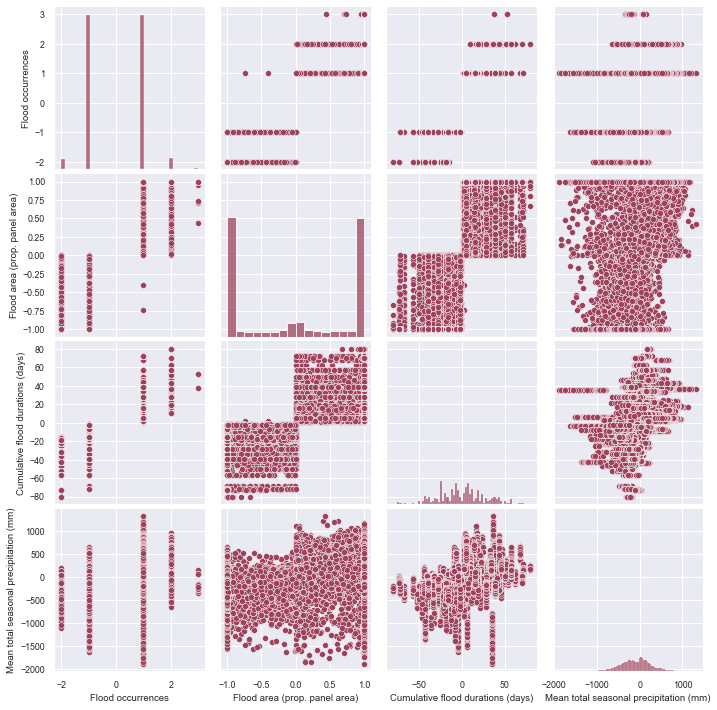

In [12]:
sns.pairplot(full_data.loc[conjunction(*conditions)], vars = cols)


plt.show()

In [13]:
mean_data = full_data.dissolve(by = 'FIDcalc', aggfunc = 'mean')

In [14]:
mean_data_proj = mean_data.to_crs('epsg:3857')

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [15]:
data_dir = "../../Data/"
shp_dir = os.path.join(data_dir, 'ADM shapefiles/')

country_names = sorted(['TCD', 'MLI', 'NER', 'NGA', 'MRT', 'BFA', 'SDN', 'SSD',
                        'ETH', 'UGA', 'KEN', 'SOM', 'ZMB', 'ZWE', 'MOZ', 'MWI'])
country_shapes = {}

for c in range(len(country_names)):
    d = gpd.read_file(os.path.join(shp_dir, '{}_adm/{}_adm0.shp'.format(country_names[c], country_names[c])))
    country_shapes[c] = d

country_df = pd.concat(country_shapes.values(), ignore_index = True)

country_df = country_df.drop(['ISO3', 'NAME_ENGLI',
   'NAME_ISO', 'NAME_FAO', 'NAME_LOCAL', 'NAME_OBSOL', 'NAME_VARIA',
   'NAME_NONLA', 'NAME_FRENC', 'NAME_SPANI', 'NAME_RUSSI',
   'NAME_ARABI', 'NAME_CHINE', 'WASPARTOF', 'CONTAINS', 'SOVEREIGN',
   'ISO2', 'WWW', 'FIPS', 'ISON', 'VALIDFR', 'VALIDTO', 'UNREGION1', 'UNREGION2', 'DEVELOPING', 'CIS',
   'Transition', 'OECD', 'WBREGION', 'WBINCOME', 'WBDEBT', 'WBOTHER',
   'CEEAC', 'CEMAC', 'CEPLG', 'COMESA', 'EAC', 'ECOWAS', 'IGAD',
   'IOC', 'MRU', 'SACU', 'UEMOA', 'UMA', 'PALOP', 'PARTA', 'CACM',
   'EurAsEC', 'Agadir', 'SAARC', 'ASEAN', 'NAFTA', 'GCC', 'CSN',
   'CARICOM', 'EU', 'CAN', 'ACP', 'Landlocked', 'AOSIS', 'SIDS',
   'Islands', 'LDC',], 1)

country_df.loc[country_df['NAME_0'] == 'South Sudan', 'ID_0'] = 222
country_df.loc[country_df['NAME_0'] == 'South Sudan', 'ISO'] = 'SSD'
country_df = country_df.to_crs('EPSG:3857')

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [16]:
diverging_cmap = LinearSegmentedColormap.from_list("diverging", ['#556b2f', '#fafad2', '#8f3c54'])
seq_cmap_ipc = LinearSegmentedColormap.from_list("sequential", ['#fafad2', '#8f3c54'])
seq_cmap_floods = LinearSegmentedColormap.from_list("sequential", ['#fafad2', '#556b2f'])

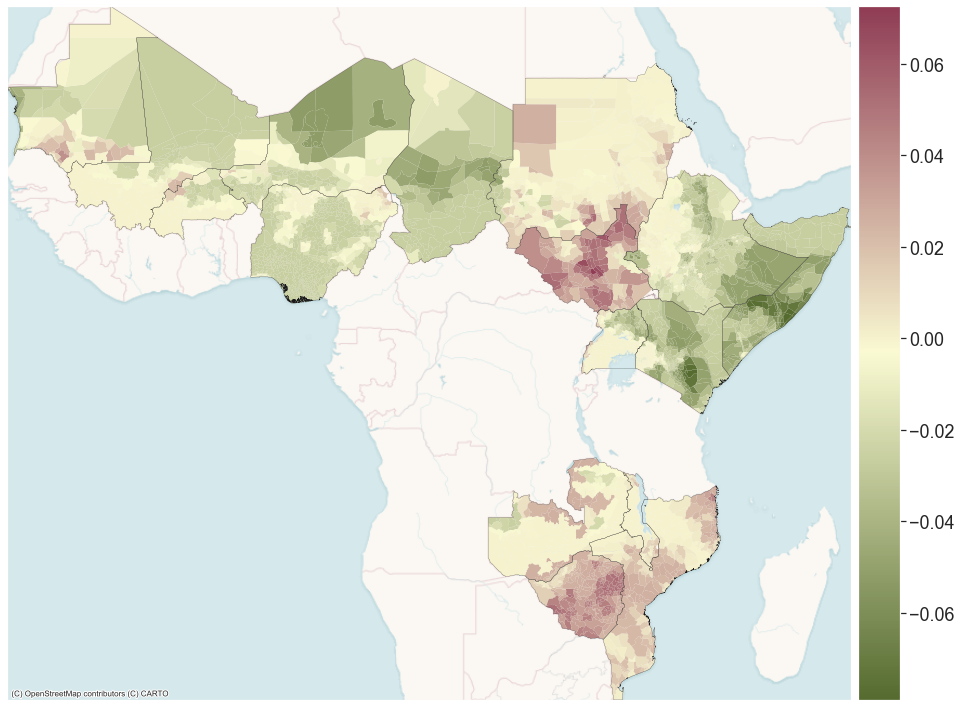

In [17]:
fig, ax = plt.subplots(figsize = (16,16))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
mean_data_proj.plot(ax = ax, linewidth=0, column = 'mean_ipc_diff', edgecolor = None, cmap = diverging_cmap,
                  legend = True, cax=cax)

country_df.geometry.boundary.plot(ax=ax, color = None, edgecolor = "k", linewidth = 0.2)

ax.set(xlim = tuple(mean_data_proj.total_bounds[[0,2]]), ylim = tuple(mean_data_proj.total_bounds[[1,3]]))
# ax.set_title('Average first-differenced mean IPC over 2009–2020', fontsize = 16, loc = 'left')
cax.tick_params(labelsize=18)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.VoyagerNoLabels)

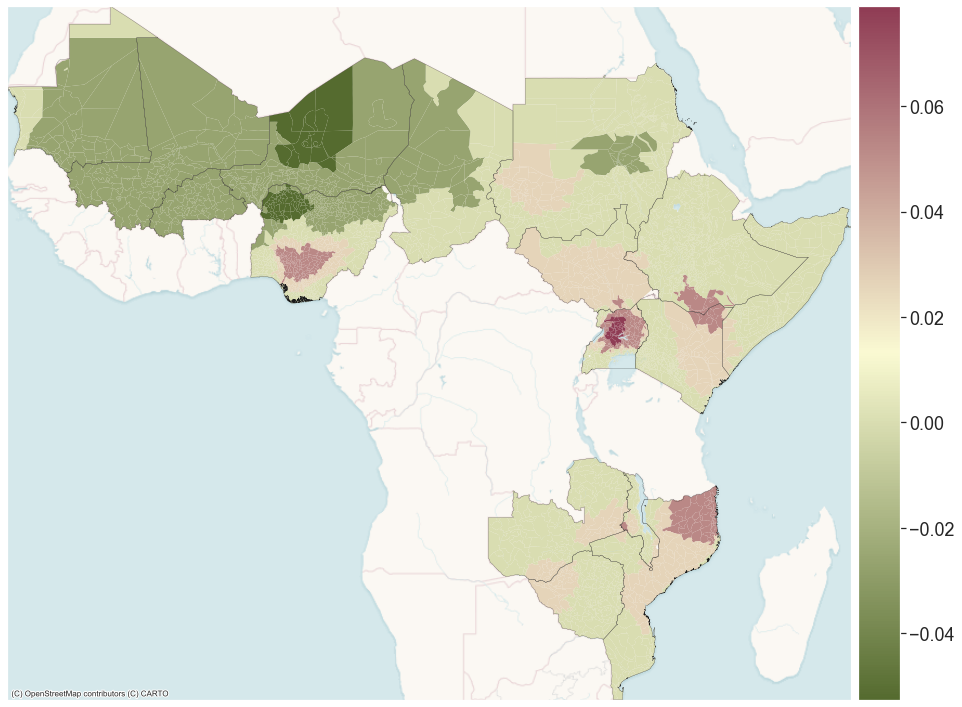

In [18]:
fig, ax = plt.subplots(figsize = (16,16))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
mean_data_proj.plot(ax = ax, linewidth=0, column = 'Flood occurrences', edgecolor = None, cmap = diverging_cmap,
                  legend = True, cax=cax)

country_df.geometry.boundary.plot(ax=ax, color = None, edgecolor = "k", linewidth = 0.2)

ax.set(xlim = tuple(mean_data_proj.total_bounds[[0,2]]), ylim = tuple(mean_data_proj.total_bounds[[1,3]]))
# ax.set_title('Average first-differenced flood occurrences over 2009–2020', fontsize = 16, loc = 'left')
cax.tick_params(labelsize=18)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.VoyagerNoLabels)

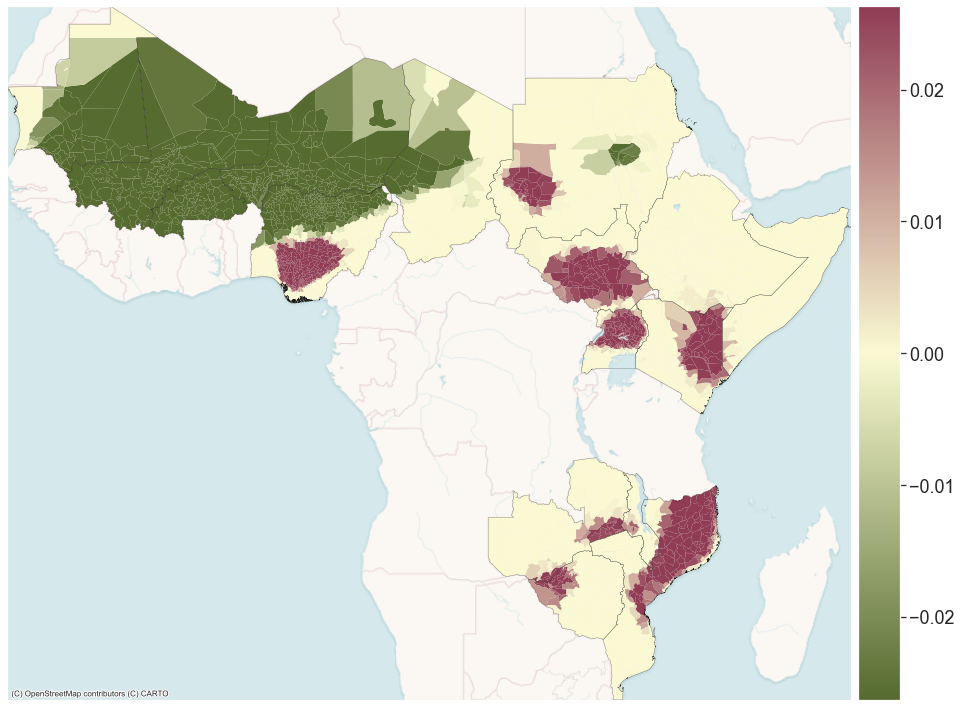

In [19]:
fig, ax = plt.subplots(figsize = (16,16))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
mean_data_proj.plot(ax = ax, linewidth=0, column = 'Flood area (prop. panel area)', edgecolor = None, cmap = diverging_cmap,
                  legend = True, cax=cax)

country_df.geometry.boundary.plot(ax=ax, color = None, edgecolor = "k", linewidth = 0.2)

ax.set(xlim = tuple(mean_data_proj.total_bounds[[0,2]]), ylim = tuple(mean_data_proj.total_bounds[[1,3]]))
# ax.set_title('Average first-differenced flood area as proportion of panel area over 2009–2020', fontsize = 16, loc = 'left')
cax.tick_params(labelsize=18)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.VoyagerNoLabels)

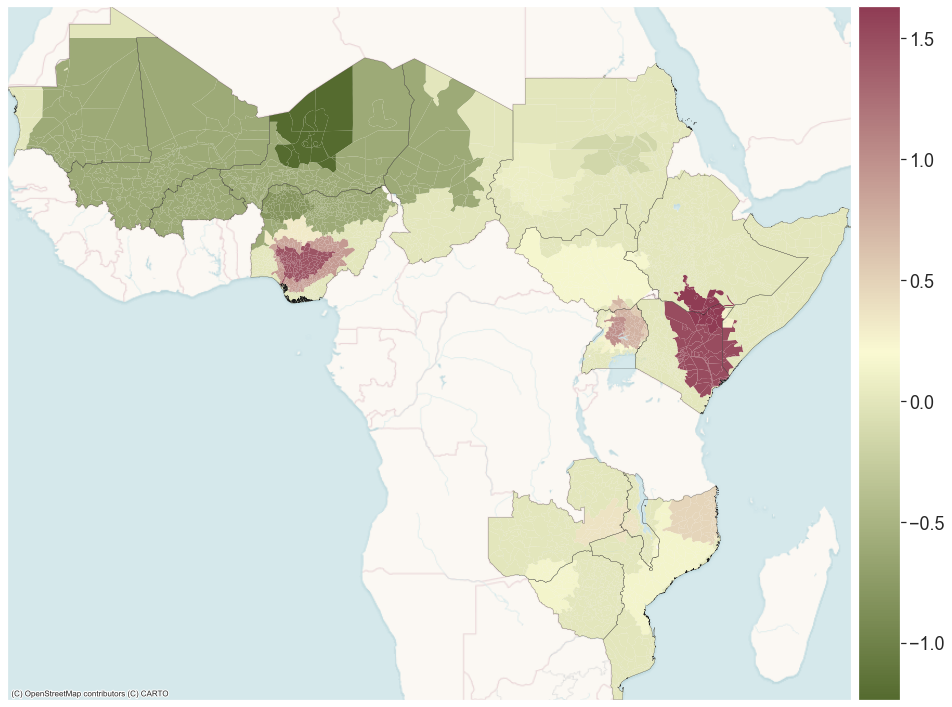

In [20]:
fig, ax = plt.subplots(figsize = (16,16))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
mean_data_proj.plot(ax = ax, linewidth=0, column = 'Cumulative flood durations (days)', edgecolor = None, cmap = diverging_cmap,
                  legend = True, cax=cax)

country_df.geometry.boundary.plot(ax=ax, color = None, edgecolor = "k", linewidth = 0.2)

ax.set(xlim = tuple(mean_data_proj.total_bounds[[0,2]]), ylim = tuple(mean_data_proj.total_bounds[[1,3]]))
# ax.set_title('Average first-differenced cumulative seasonal flood duration over 2009–2020', fontsize = 16, loc = 'left')
cax.tick_params(labelsize=18)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.VoyagerNoLabels)

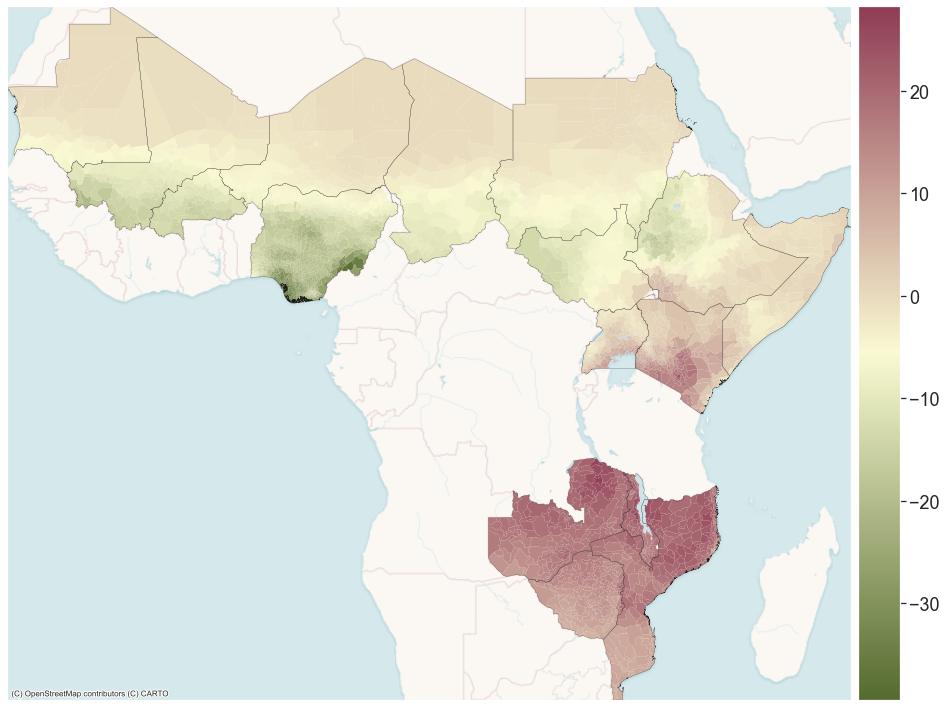

In [21]:
fig, ax = plt.subplots(figsize = (16,16))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
mean_data_proj.plot(ax = ax, linewidth=0, column = 'Mean total seasonal precipitation (mm)', edgecolor = None, cmap = diverging_cmap,
                  legend = True, cax=cax)

country_df.geometry.boundary.plot(ax=ax, color = None, edgecolor = "k", linewidth = 0.2)

ax.set(xlim = tuple(mean_data_proj.total_bounds[[0,2]]), ylim = tuple(mean_data_proj.total_bounds[[1,3]]))
# ax.set_title('Average first-differenced mean total seasonal precipitation over 2009–2020', fontsize = 16, loc = 'left')
cax.tick_params(labelsize=18)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.VoyagerNoLabels)

In [22]:
def samp_var(x):
    return np.var(x, ddof = 1)
var_data = full_data.dissolve(by = 'FIDcalc', aggfunc = samp_var)

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


In [23]:
var_data_proj = var_data.to_crs('epsg:3857')

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


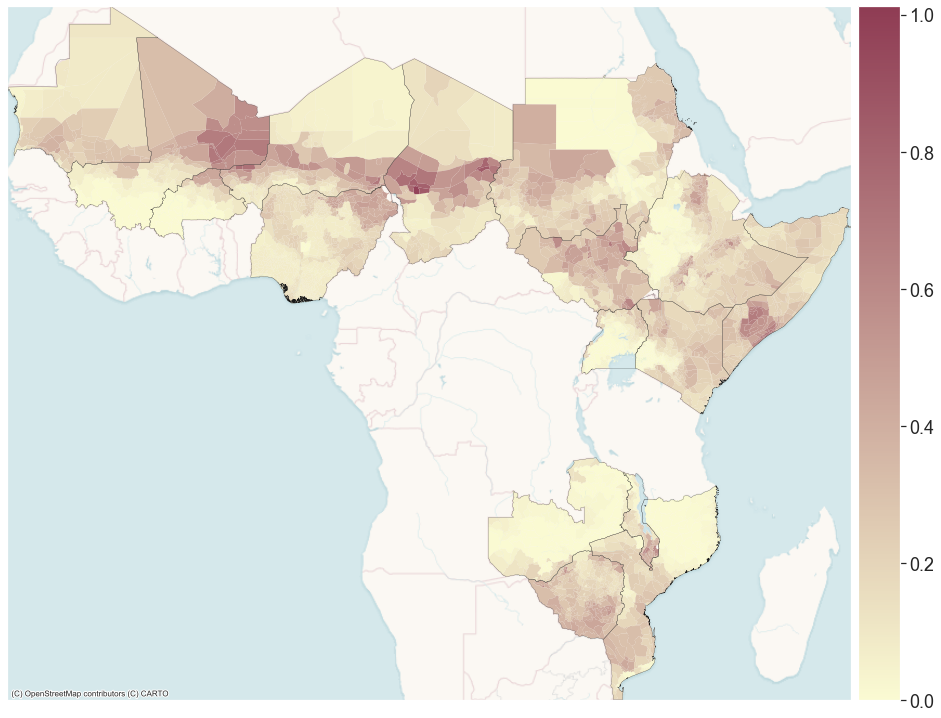

In [24]:
fig, ax = plt.subplots(figsize = (16,16))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
var_data_proj.plot(ax = ax, linewidth=0, column = 'mean_ipc_diff', edgecolor = None, cmap = seq_cmap_ipc,
                  legend = True, cax=cax)

country_df.geometry.boundary.plot(ax=ax, color = None, edgecolor = "k", linewidth = 0.2)

ax.set(xlim = tuple(mean_data_proj.total_bounds[[0,2]]), ylim = tuple(mean_data_proj.total_bounds[[1,3]]))
# ax.set_title('Variance of first-differenced mean IPC over 2009–2020', fontsize = 16, loc = 'left')
cax.tick_params(labelsize=18)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.VoyagerNoLabels)

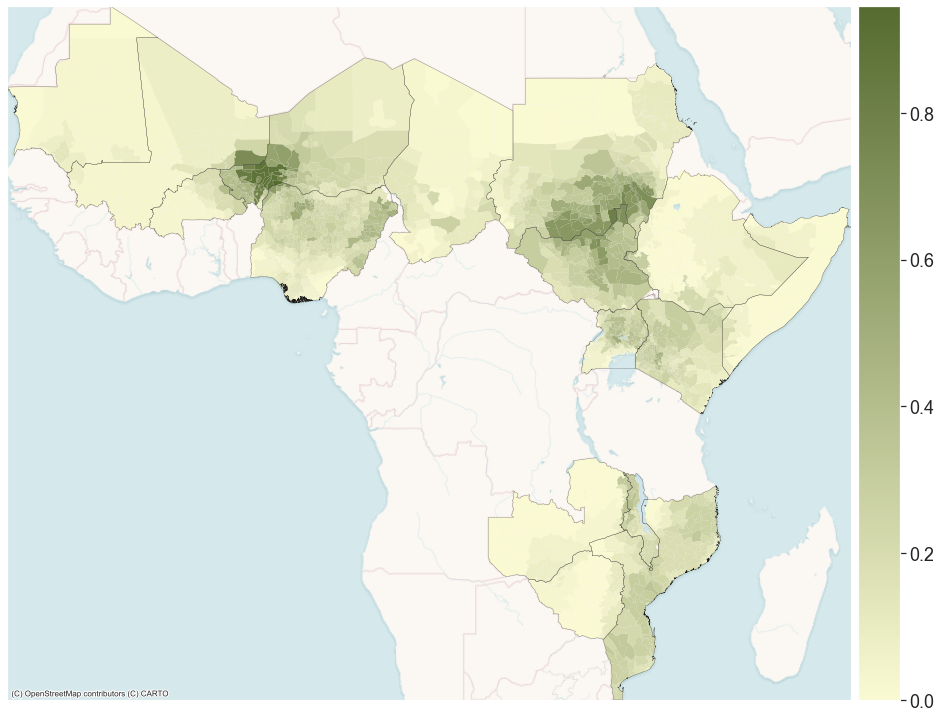

In [25]:
fig, ax = plt.subplots(figsize = (16,16))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
var_data_proj.plot(ax = ax, linewidth=0, column = 'Flood occurrences', edgecolor = None, cmap = seq_cmap_floods,
                  legend = True, cax=cax)

country_df.geometry.boundary.plot(ax=ax, color = None, edgecolor = "k", linewidth = 0.2)

ax.set(xlim = tuple(mean_data_proj.total_bounds[[0,2]]), ylim = tuple(mean_data_proj.total_bounds[[1,3]]))
# ax.set_title('Variance of first-differenced flood occurrences over 2009–2020', fontsize = 16, loc = 'left')
cax.tick_params(labelsize=18)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.VoyagerNoLabels)

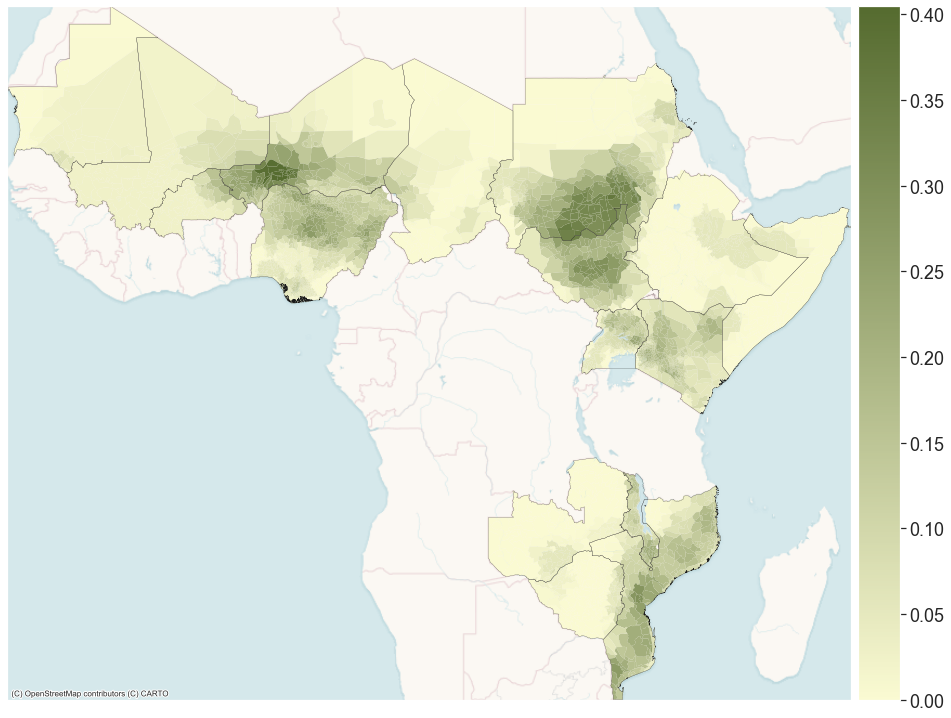

In [26]:
fig, ax = plt.subplots(figsize = (16,16))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
var_data_proj.plot(ax = ax, linewidth=0, column = 'Flood area (prop. panel area)', edgecolor = None, cmap = seq_cmap_floods,
                  legend = True, cax=cax)

country_df.geometry.boundary.plot(ax=ax, color = None, edgecolor = "k", linewidth = 0.2)

ax.set(xlim = tuple(mean_data_proj.total_bounds[[0,2]]), ylim = tuple(mean_data_proj.total_bounds[[1,3]]))
# ax.set_title('Variance of first-differenced flood area as proportion of panel area over 2009–2020', fontsize = 16, loc = 'left')
cax.tick_params(labelsize=18)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.VoyagerNoLabels)

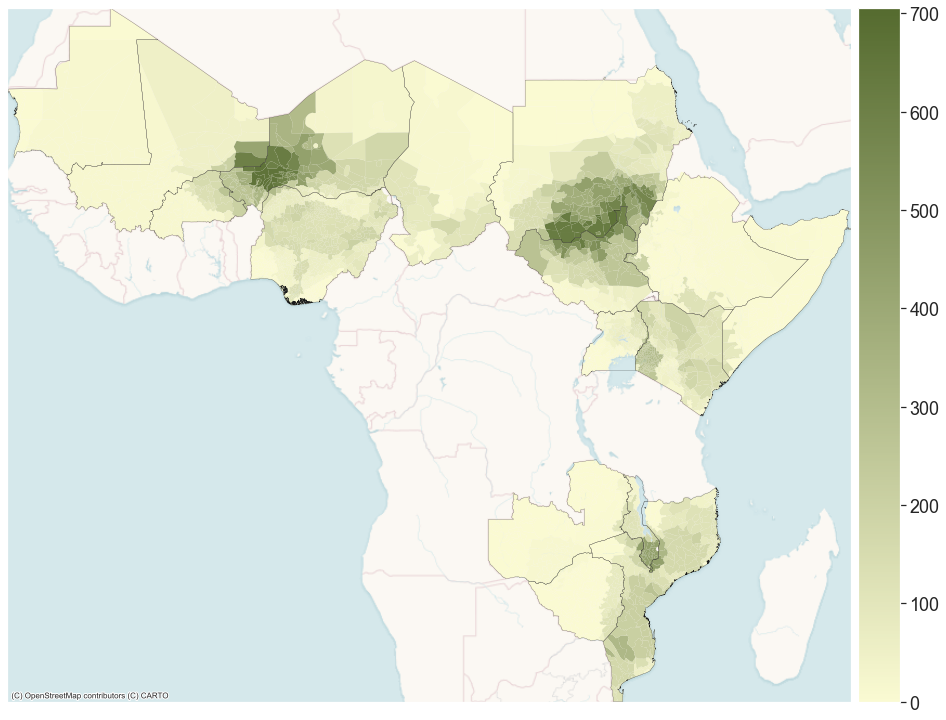

In [27]:
fig, ax = plt.subplots(figsize = (16,16))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
var_data_proj.plot(ax = ax, linewidth=0, column = 'Cumulative flood durations (days)', edgecolor = None, cmap = seq_cmap_floods,
                  legend = True, cax=cax)

country_df.geometry.boundary.plot(ax=ax, color = None, edgecolor = "k", linewidth = 0.2)

ax.set(xlim = tuple(mean_data_proj.total_bounds[[0,2]]), ylim = tuple(mean_data_proj.total_bounds[[1,3]]))
# ax.set_title('Variance of first-differenced cumulative seasonal flood duration over 2009–2020', fontsize = 16, loc = 'left')
cax.tick_params(labelsize=18)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.VoyagerNoLabels)

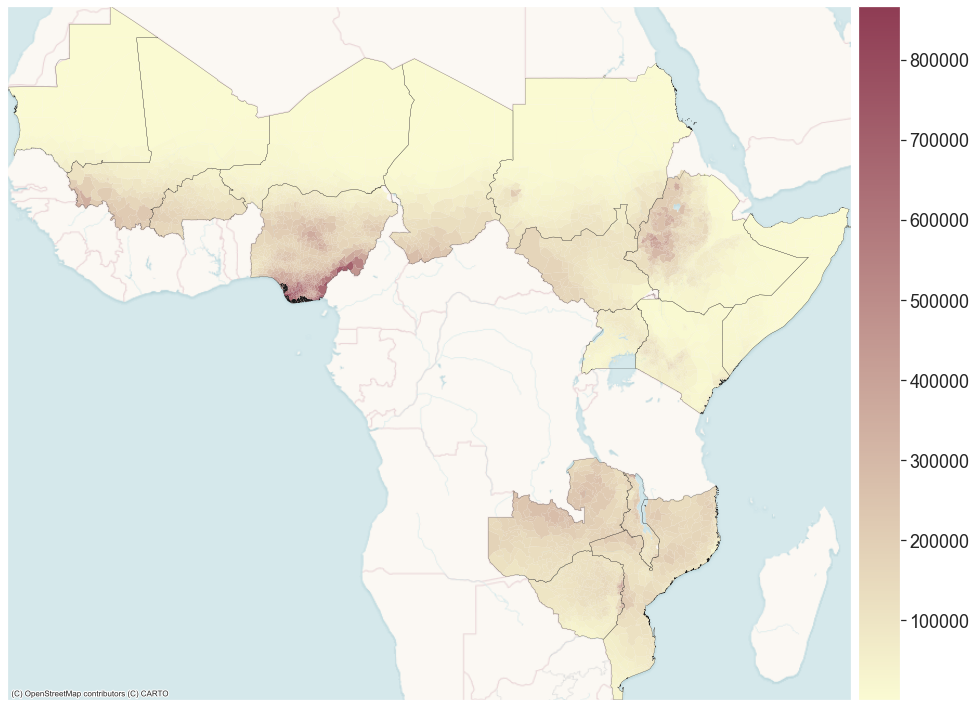

In [106]:
fig, ax = plt.subplots(figsize = (16,16))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
var_data_proj.plot(ax = ax, linewidth=0, column = 'Mean total seasonal precipitation (mm)', edgecolor = None, cmap = seq_cmap_floods,
                  legend = True, cax=cax)

country_df.geometry.boundary.plot(ax=ax, color = None, edgecolor = "k", linewidth = 0.2)

ax.set(xlim = tuple(mean_data_proj.total_bounds[[0,2]]), ylim = tuple(mean_data_proj.total_bounds[[1,3]]))
# ax.set_title('Variance of first-differenced mean total seasonal precipitation over 2009–2020', fontsize = 16, loc = 'left')
cax.tick_params(labelsize=18)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ctx.add_basemap(ax, source = ctx.providers.CartoDB.VoyagerNoLabels)

Calculate average population in IPC 2 or greater

In [10]:
full_data.columns.values

array(['level_0', 'index', 'FNID', 'EFF_YEAR', 'COUNTRY', 'Name',
       'ADMIN1', 'ADMIN2', 'ALIASES', 'LZcode_fin', 'FIDcalc', 'Year',
       'Month', 'datetime_end', 'datetime_start', 'no_flood_events',
       'no_dam_breaks', 'total_flood_dur_days', 'flood_1_7_days',
       'flood_8_14_days', 'flood_15_21_days', 'flood_22_28_days',
       'flood_29_plus_days', 'total_flood_area_km2',
       'total_flood_area_std', 'total_displaced_dfo', 'mean_ipc',
       'var_ipc', 'season', 'mean_ipc_diff', 'mean_ipc_deseasoned',
       'mean_ipc_deseasoned_diff', 'var_ipc_diff', 'var_ipc_deseasoned',
       'var_ipc_deseasoned_diff', 'no_floods_diff',
       'no_floods_deseasoned', 'no_floods_deseasoned_diff',
       'total_flood_area_diff', 'total_flood_area_deseasoned',
       'total_flood_area_deseasoned_diff', 'total_flood_dur_diff',
       'total_flood_dur_deseasoned', 'total_flood_dur_deseasoned_ret',
       'total_precip_mm', 'mean_total_precip_mm', 'test',
       'mean_total_precip_mm_di

In [11]:
df_pop = gpd.read_file(os.path.join("../../Data", "IPC", "LZ_adm2_geometryFix_population.gpkg"))

In [13]:
df_pop = df_pop.rename(columns = {'ADMIN0': 'Name'})

In [29]:
df_pop = df_pop.drop('geometry', axis =1)

In [34]:
df_pop.columns

Index(['FNID', 'EFF_YEAR', 'COUNTRY', 'Name', 'ADMIN1', 'ADMIN2', 'ALIASES',
       'LZcode_fin', 'FIDcalc', '2020_pop'],
      dtype='object')

In [35]:
full_data = pd.merge(full_data, df_pop, on = ['FNID', 'EFF_YEAR', 'COUNTRY', 'Name', 'ADMIN1',
                                             'ADMIN2', 'ALIASES', 'LZcode_fin', 'FIDcalc'],
                    how = 'left')

In [44]:
full_data[full_data['mean_ipc'] >= 2.0].groupby(['datetime_end'])['2020_pop'].sum().mean()

122356365.81452793

In [43]:
full_data[full_data['mean_ipc'] > 1.0].groupby(['datetime_end'])['2020_pop'].sum().mean()

296970824.3753412